In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
house_data = pd.read_csv('./ManualPreprocessedAmesHousing.csv')
house_data.head()


,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Lot Shape,Lot Config,Bldg Type,House Style,Overall Qual,Overall Cond,...,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Sale Type,Sale Condition,SalePrice
0,20,RL,141,31770,IR1,Corner,1Fam,1Story,6,5,...,P,210,62,0,0,0,0,WD,Normal,215.0
1,20,RH,80,11622,Reg,Inside,1Fam,1Story,5,6,...,Y,140,0,0,0,120,0,WD,Normal,105.0
2,20,RL,81,14267,IR1,Corner,1Fam,1Story,6,6,...,Y,393,36,0,0,0,0,WD,Normal,172.0
3,20,RL,93,11160,Reg,Corner,1Fam,1Story,7,5,...,Y,0,0,0,0,0,0,WD,Normal,244.0
4,60,RL,74,13830,IR1,Inside,1Fam,2Story,5,5,...,Y,212,34,0,0,0,0,WD,Normal,189.9


(31, 31)


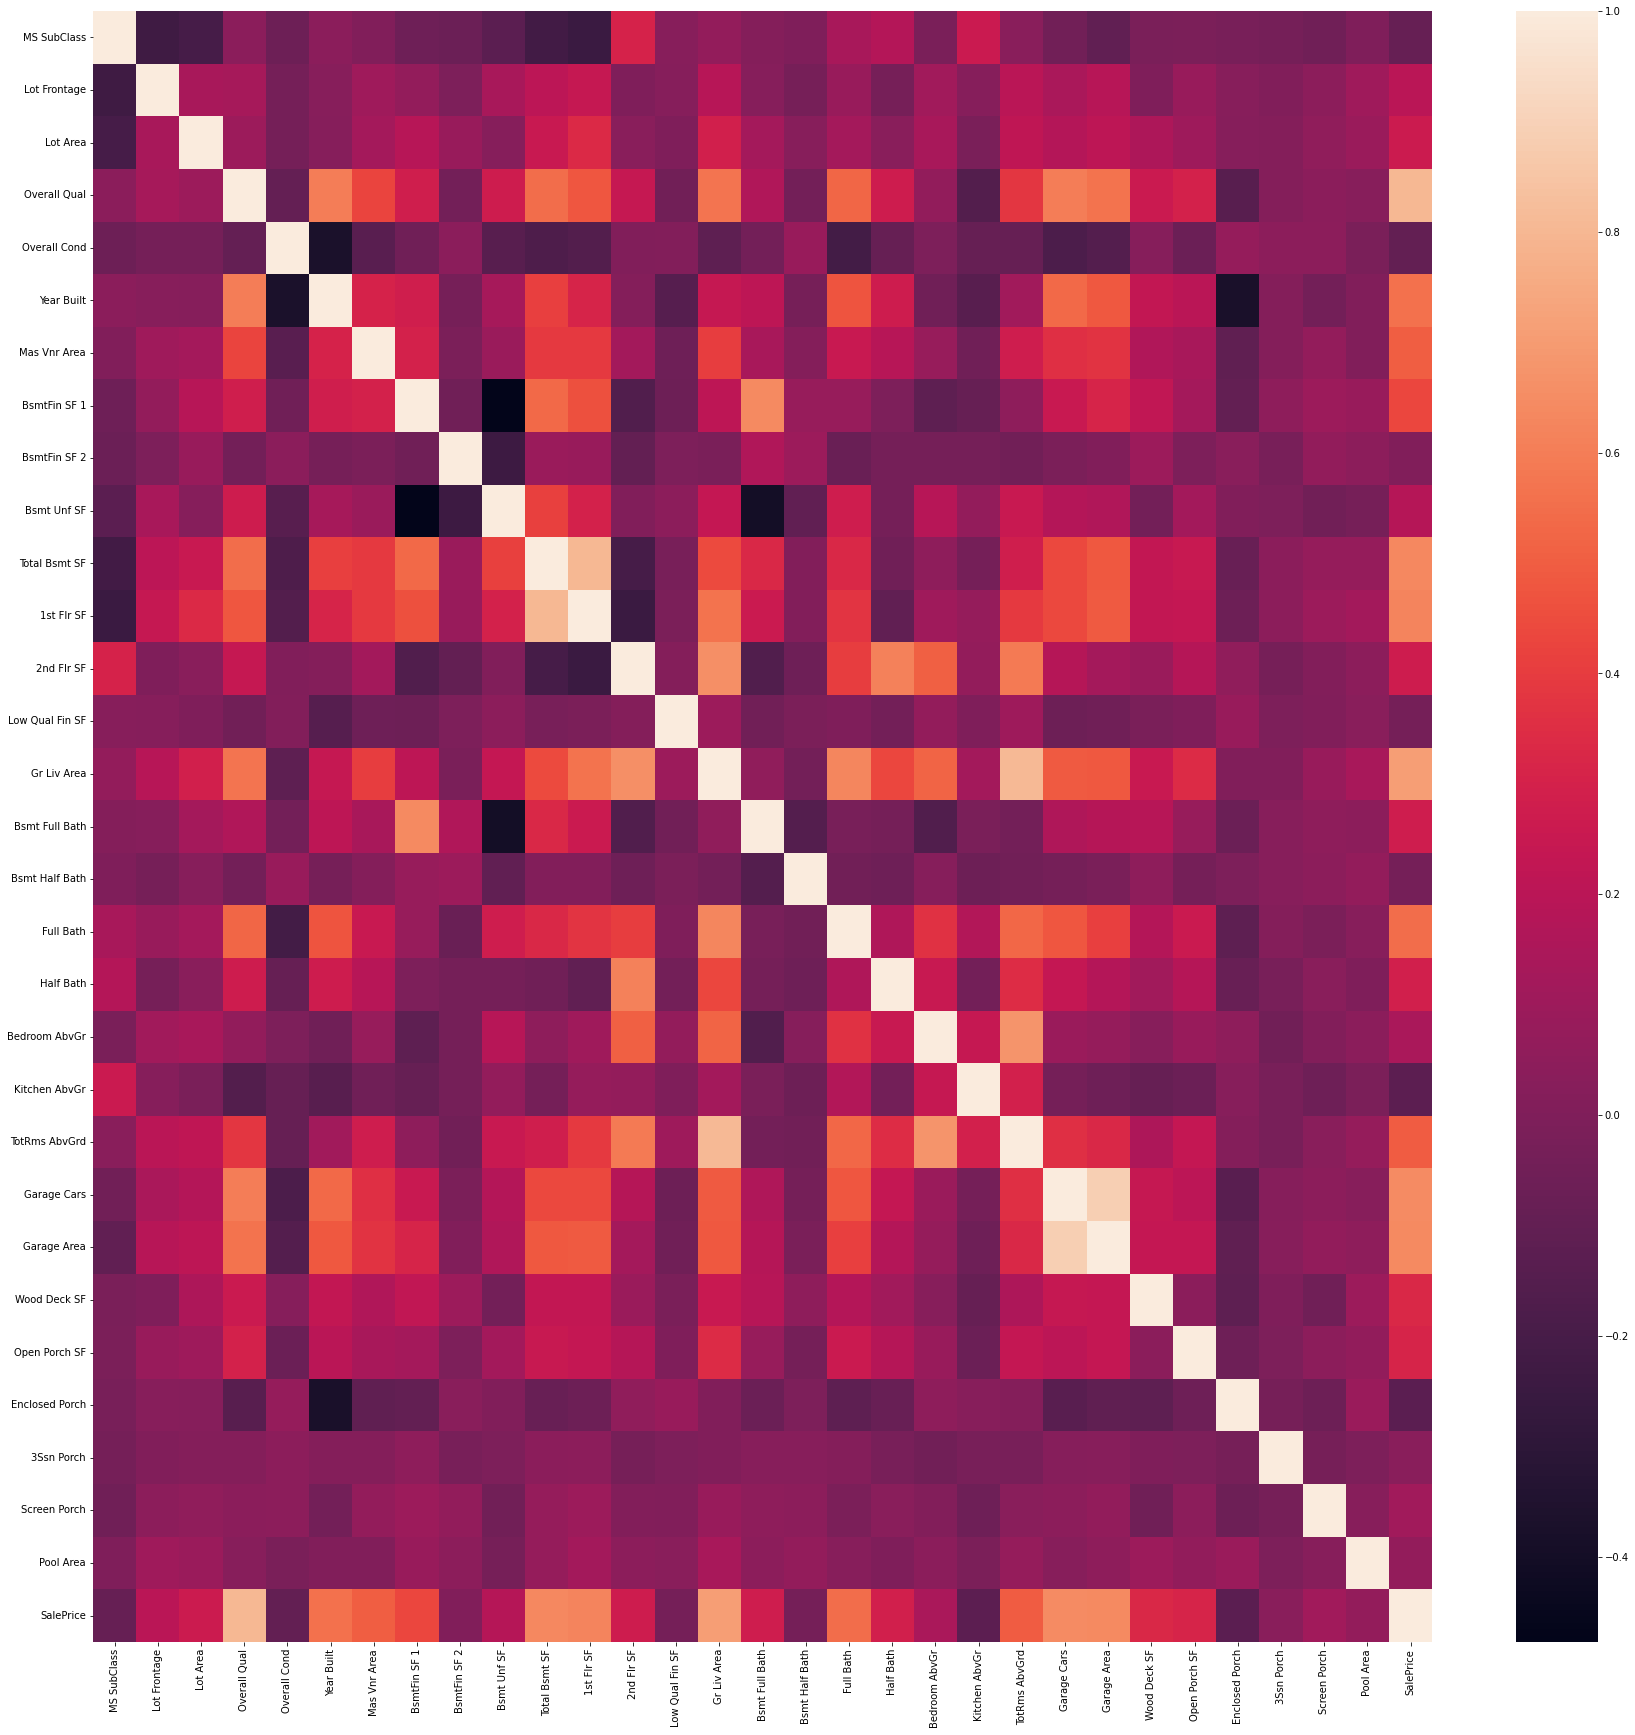

In [7]:
plt.figure(figsize=(30, 30))
sns.heatmap(house_data.corr())
print(house_data.corr().shape)

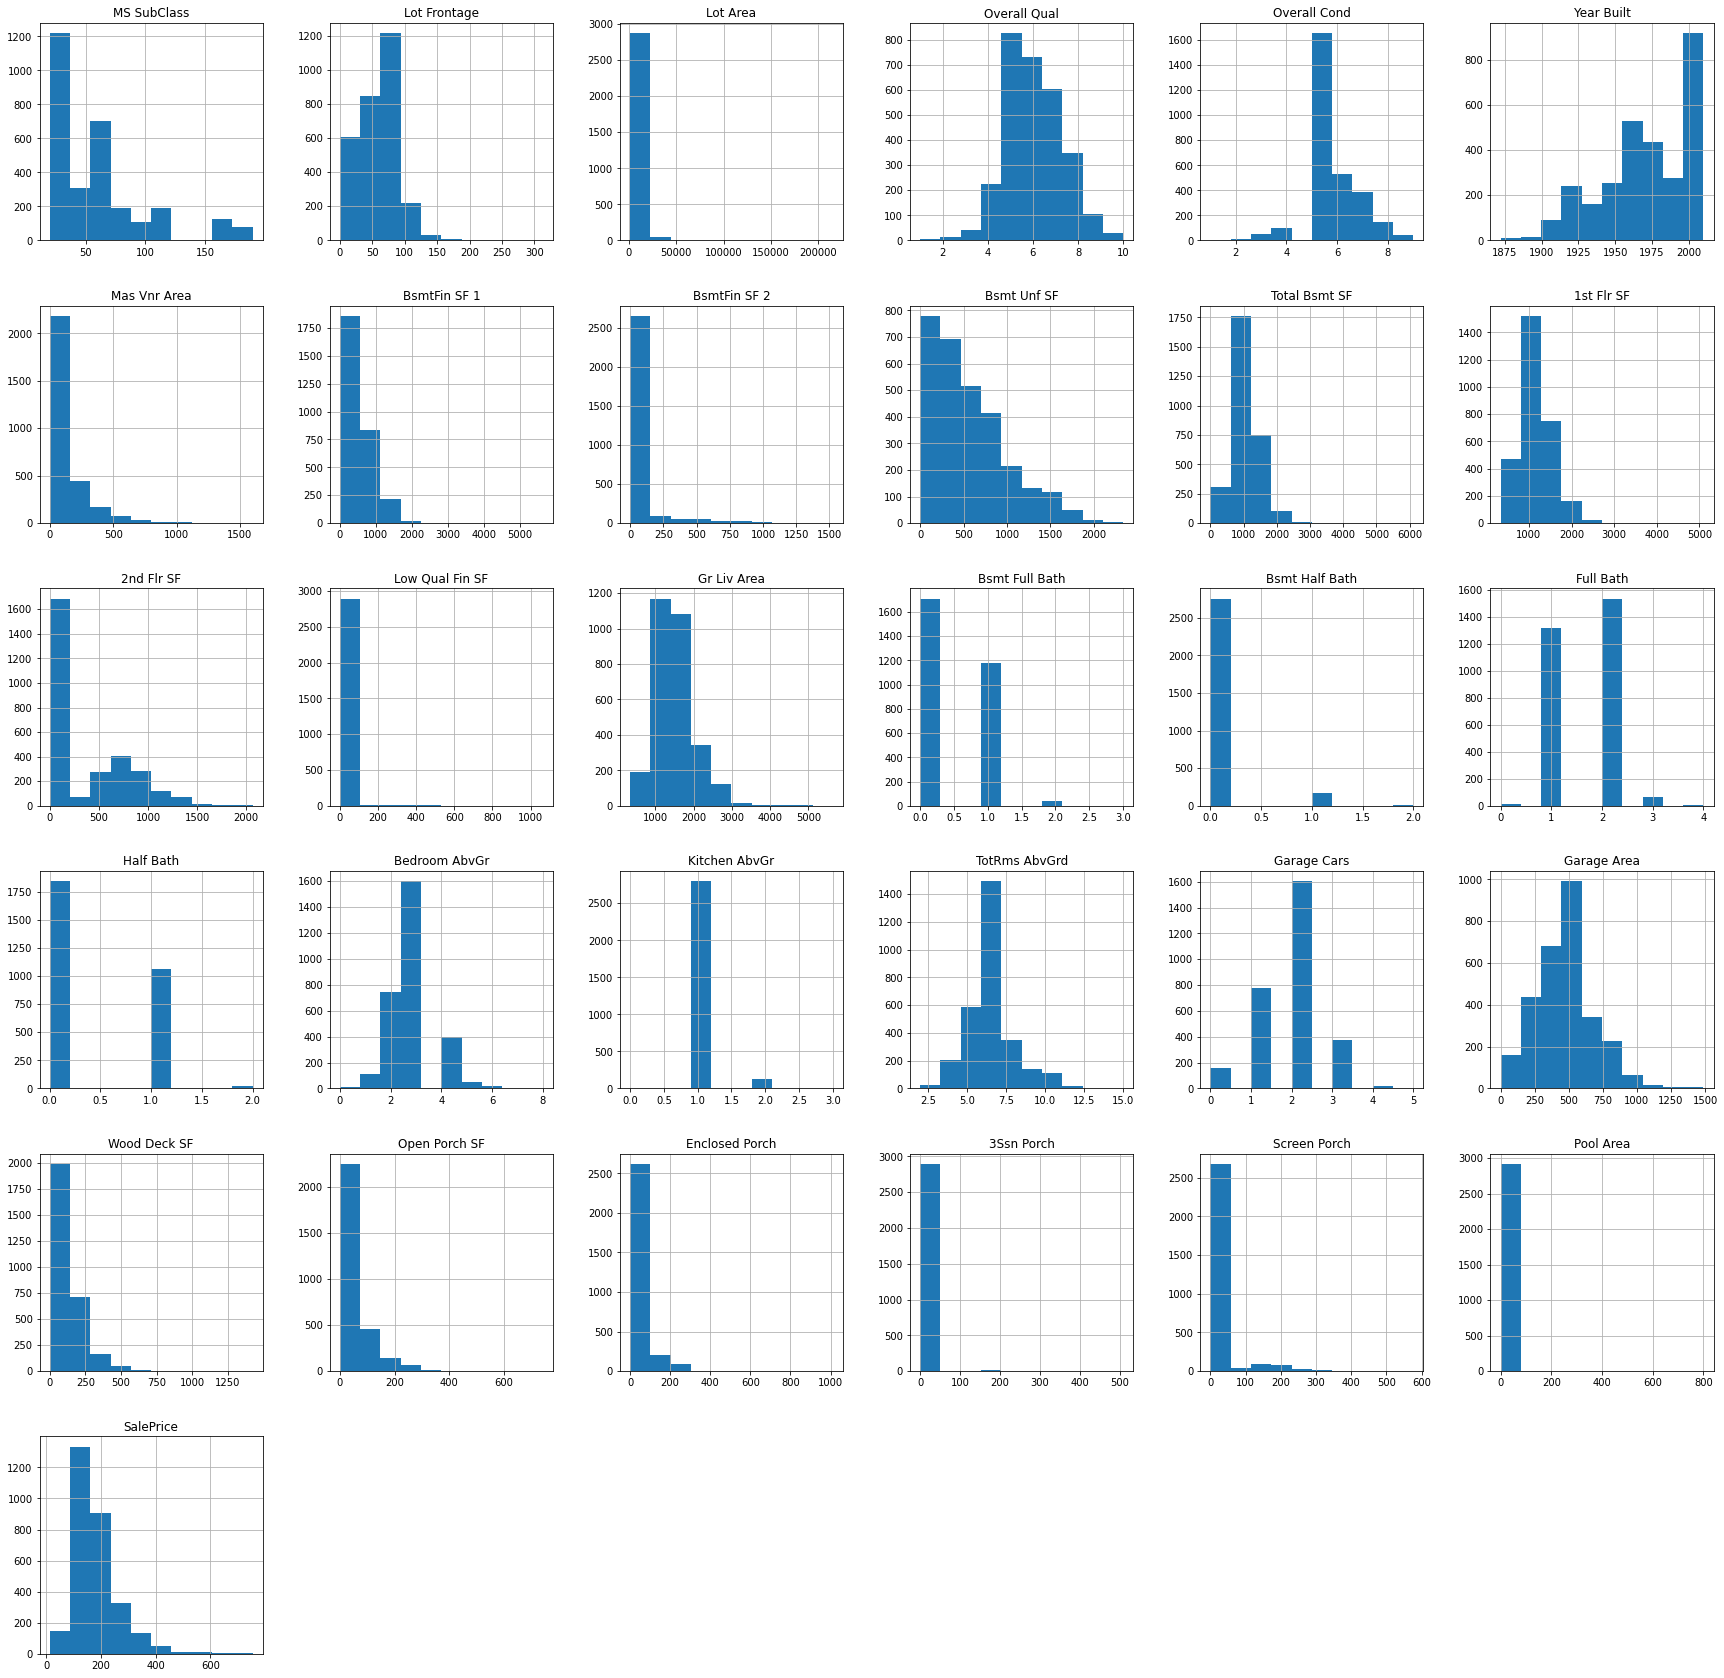

In [8]:
house_data.hist(figsize=(30, 30))
plt.show()

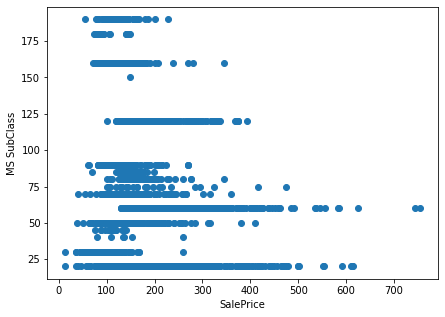

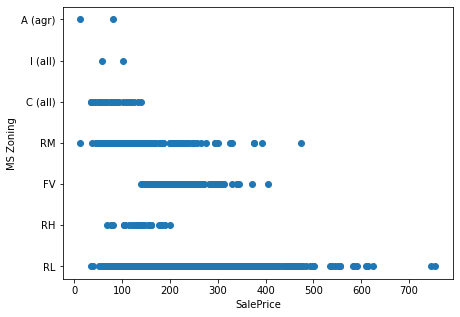

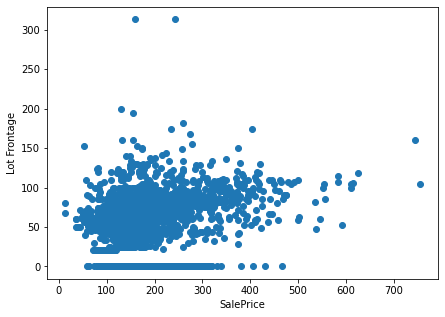

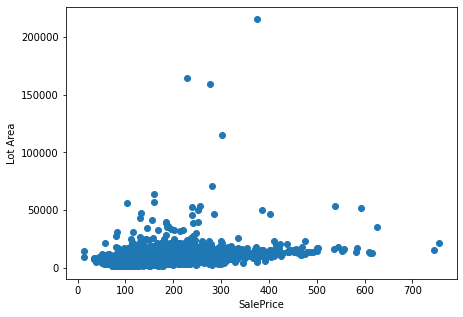

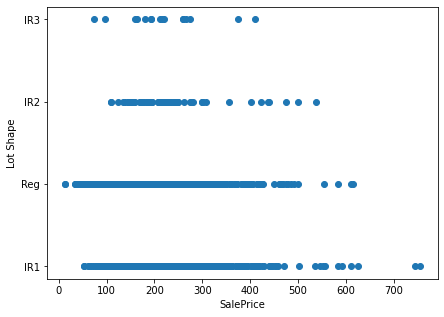

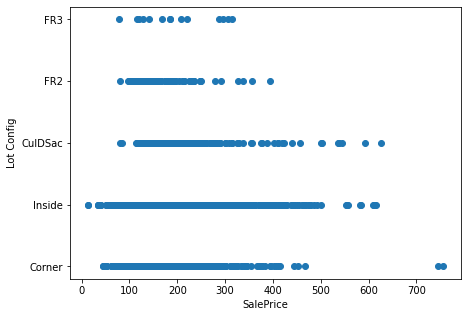

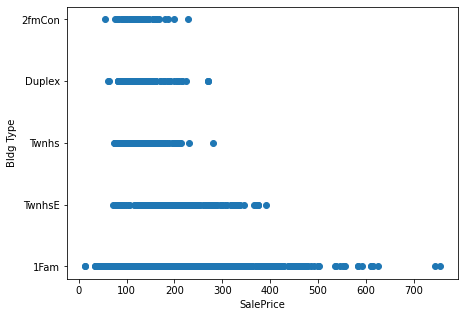

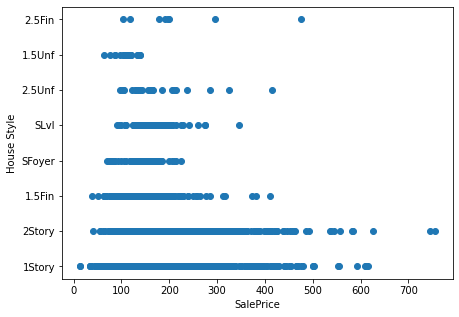

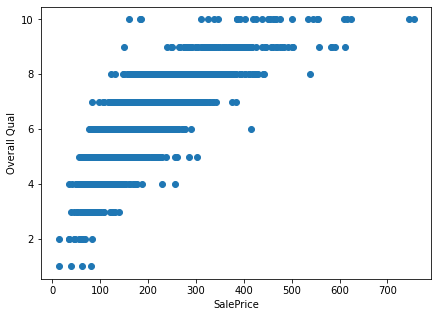

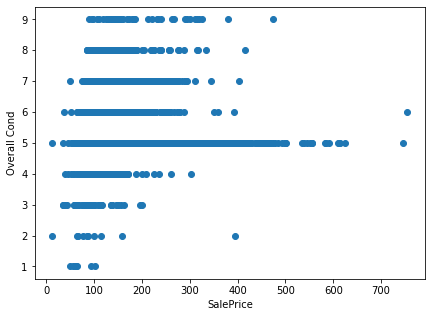

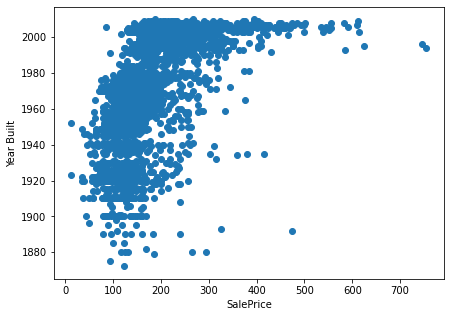

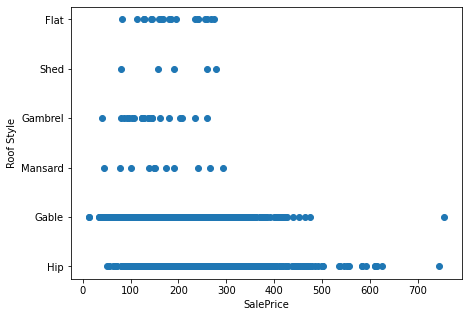

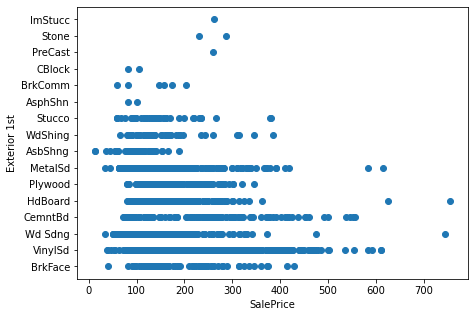

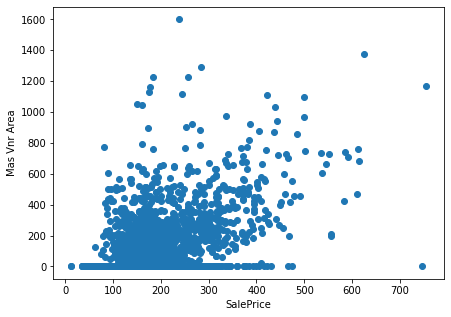

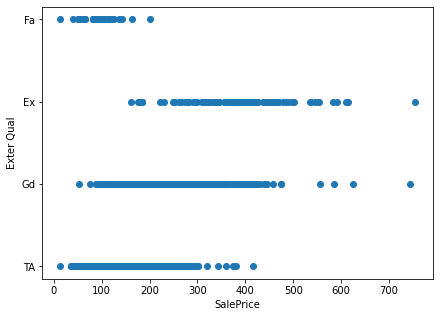

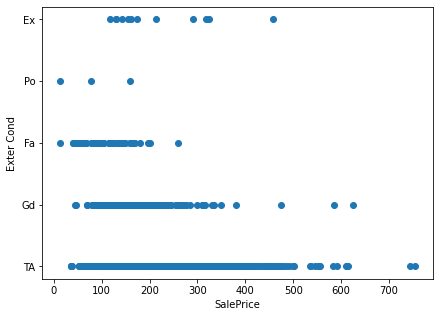

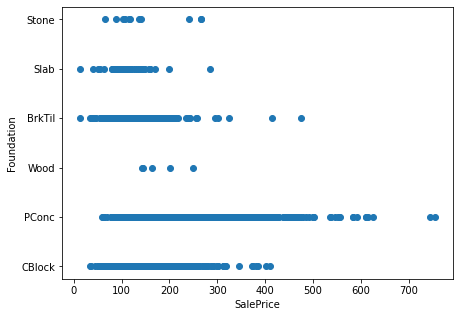

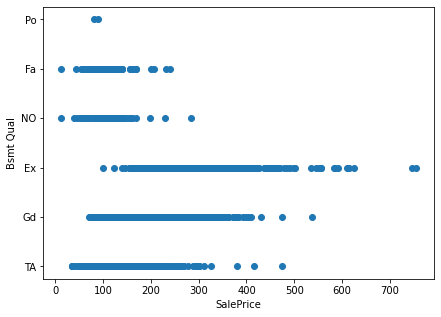

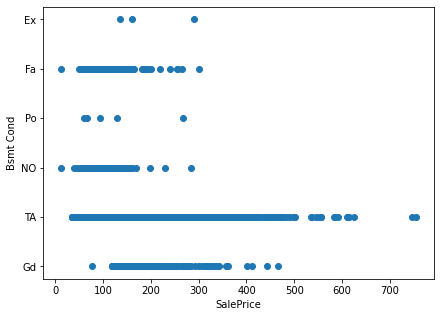

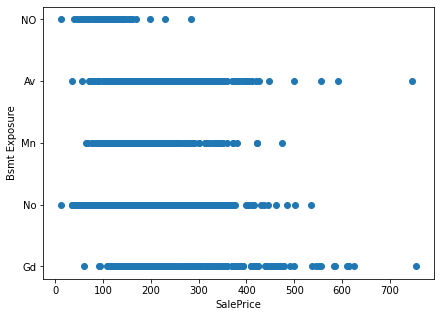

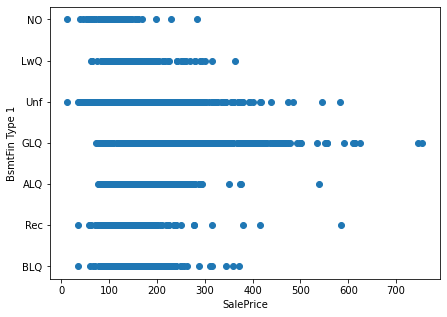

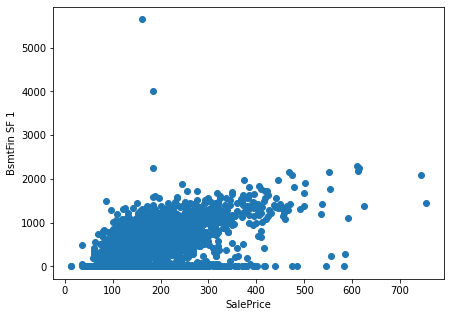

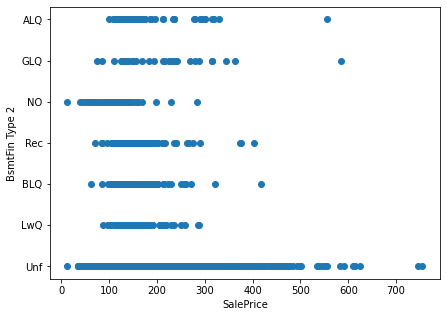

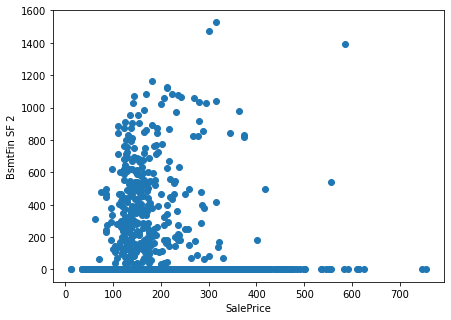

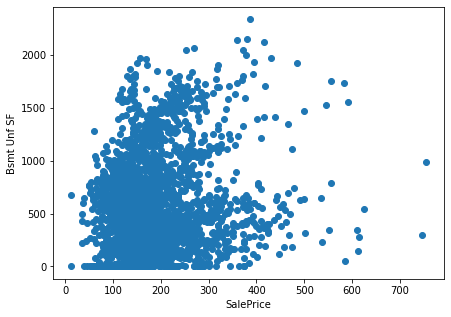

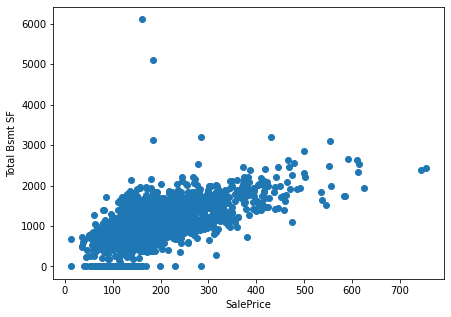

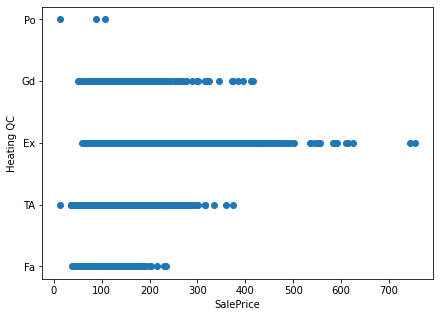

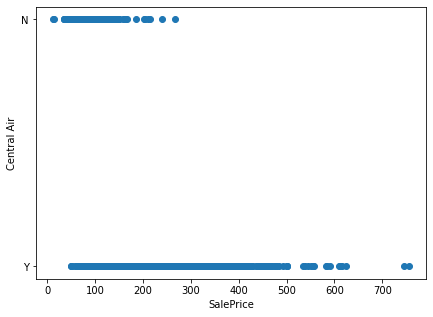

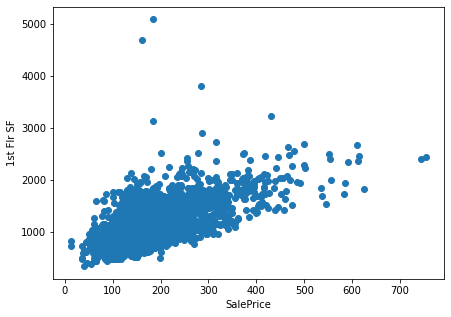

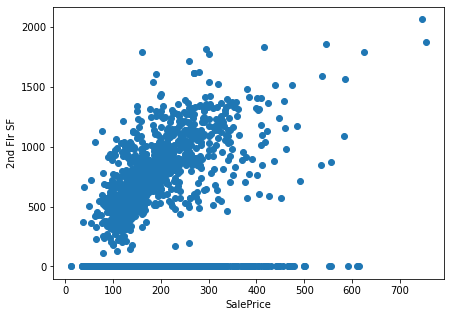

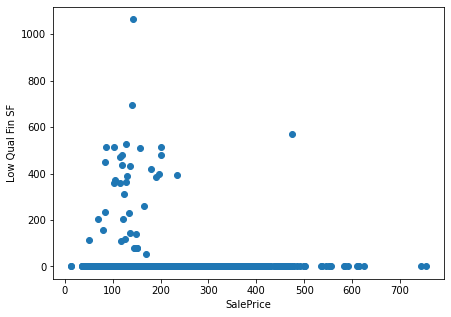

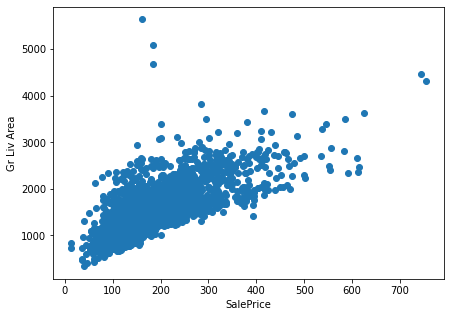

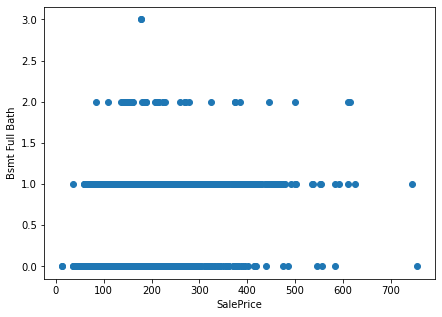

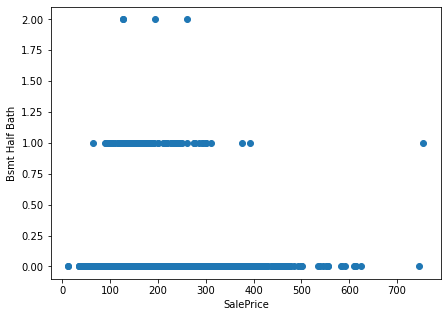

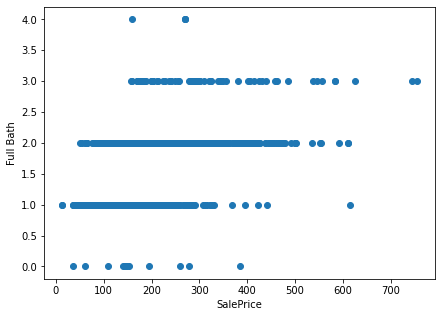

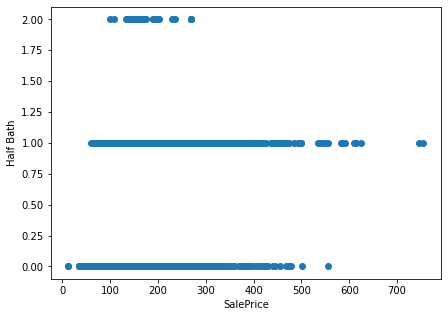

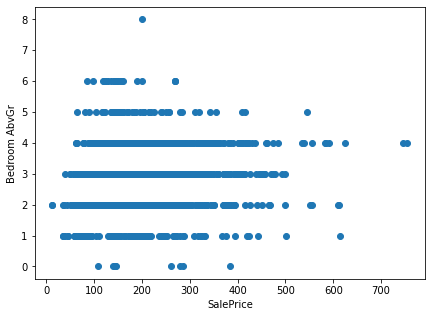

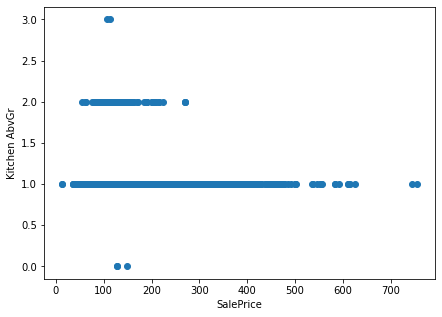

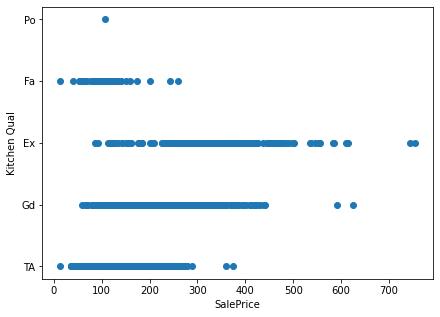

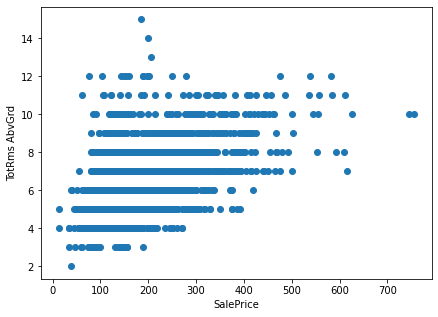

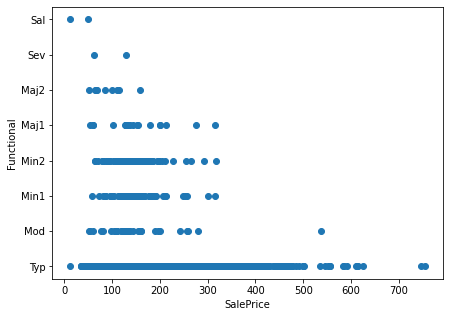

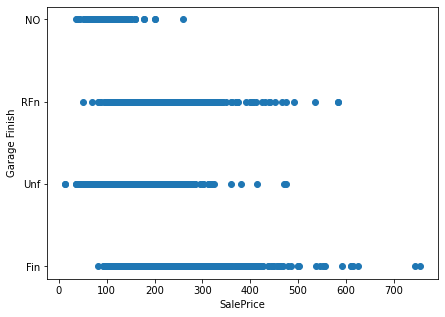

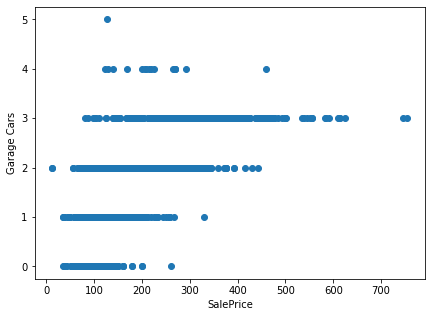

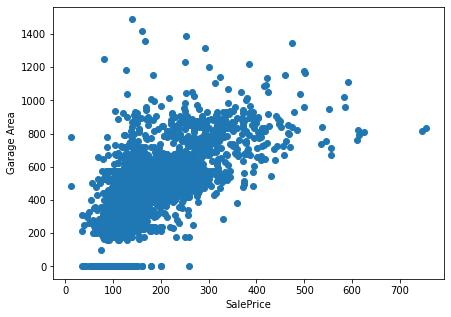

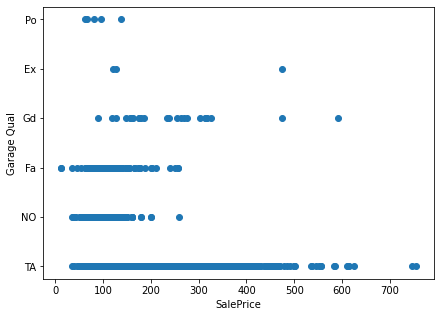

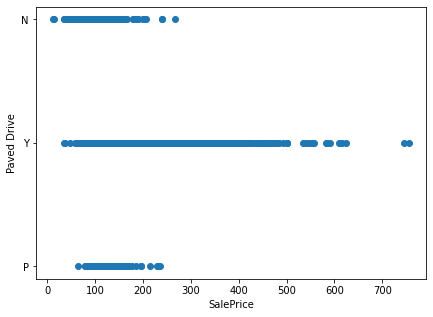

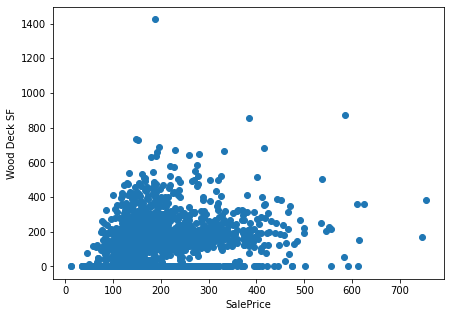

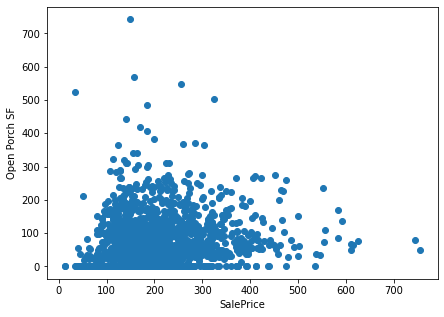

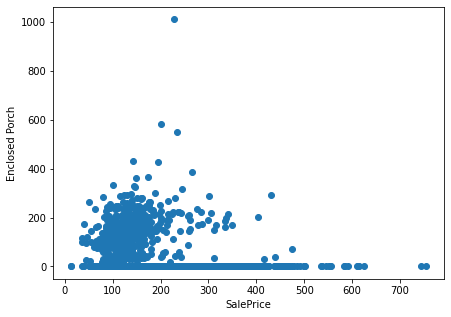

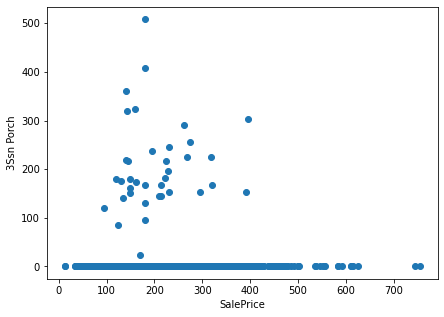

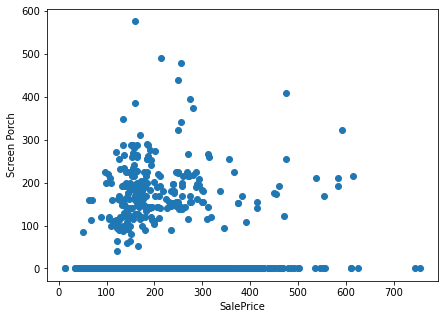

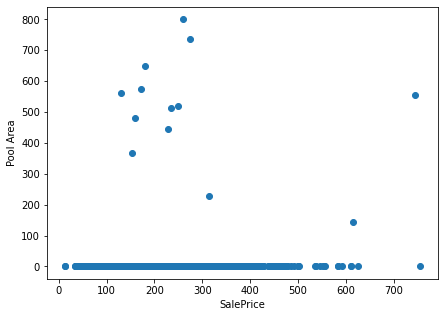

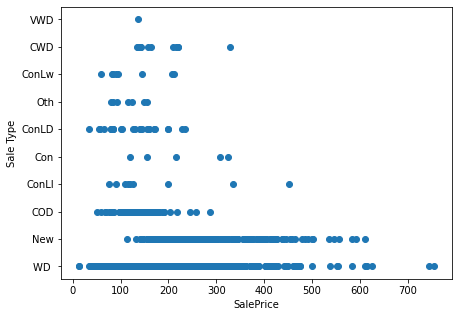

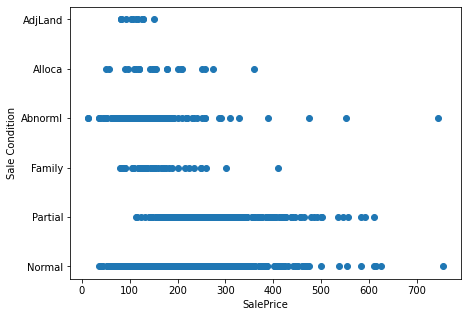

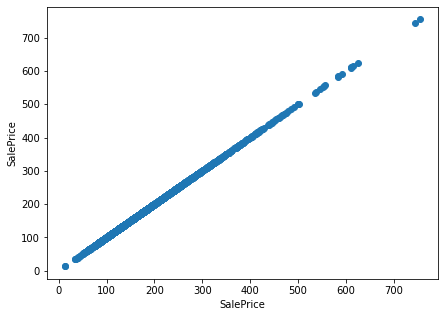

In [26]:
for column in house_data.columns:
    fig, ax = plt.subplots(figsize=(7,5))
    ax.scatter(house_data['SalePrice'], house_data[column])
    ax.set_xlabel('SalePrice')
    ax.set_ylabel(column)
    fig.savefig('Figures/Scatter/SalePrice Vs ' + column + '.png')
    plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [22]:
dummy_data = pd.get_dummies(pd.read_csv('./ManualPreprocessedAmesHousing.csv'))
train_data, test_data = train_test_split(dummy_data, test_size=0.333, random_state=42)

In [10]:
# import standardscaler
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(train_data.drop('SalePrice', axis=1))
scaled_train_data = std.transform(train_data.drop('SalePrice', axis=1))
scaled_test_data = std.transform(test_data.drop('SalePrice', axis=1))

In [23]:
lr = LinearRegression()
scaled_train_data = pd.DataFrame(train_data, columns=train_data.drop('SalePrice', axis=1).columns)
lr.fit(scaled_train_data, train_data['SalePrice'])

LinearRegression()

In [18]:
lr.score(test_data.drop('SalePrice', axis=1), test_data['SalePrice'])

0.8775402537553205

In [24]:
from sklearn.metrics import mean_squared_error
predictions = lr.predict(test_data.drop('SalePrice', axis=1))
print(mean_squared_error(test_data['SalePrice'], predictions))

823.4502857989885


In [27]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(train_data.drop('SalePrice', axis=1), train_data['SalePrice'])
dtr.score(test_data.drop('SalePrice', axis=1), test_data['SalePrice'])
dtr_predicted = dtr.predict(test_data.drop('SalePrice', axis=1))
print(mean_squared_error(test_data['SalePrice'], dtr_predicted))

1256.8931858678277


In [35]:
dataset = pd.read_csv('./ManualPreprocessedAmesHousing.csv')
# 75% quartile of the dataset
print(dataset['SalePrice'].quantile(1))
print(dataset['SalePrice'].quantile(0.75))
# 50% quartile of the dataset
print(dataset['SalePrice'].quantile(0.5))
# 25% quartile of the dataset
print(dataset['SalePrice'].quantile(0.25))
print(dataset['SalePrice'].quantile(0))

755.0
213.5
160.0
129.5
12.789


In [36]:
for i in range(len(dataset)):
    if dataset['SalePrice'][i] <= 129.5:
        dataset['SalePrice'][i] = 0
    elif dataset['SalePrice'][i] <= 160:
        dataset['SalePrice'][i] = 1
    elif dataset['SalePrice'][i] <= 213.5:
        dataset['SalePrice'][i] = 2
    else:
        dataset['SalePrice'][i] = 3

/var/folders/kx/dd0tmbz95_n461n7xxtqy1wm0000gn/T/ipykernel_8360/393953472.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['SalePrice'][i] = 3
/var/folders/kx/dd0tmbz95_n461n7xxtqy1wm0000gn/T/ipykernel_8360/393953472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['SalePrice'][i] = 0
/var/folders/kx/dd0tmbz95_n461n7xxtqy1wm0000gn/T/ipykernel_8360/393953472.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datas

In [37]:
dataset.to_csv("ManualPreprocessedAmesHousingClassification.csv")

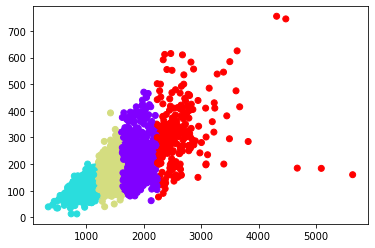

In [50]:
# KMeans
from sklearn.cluster import KMeans
dataset = pd.read_csv('./ManualPreprocessedAmesHousing.csv')
kmeans = KMeans(n_clusters=4)
kmeans.fit(dataset[['Gr Liv Area', 'SalePrice']])

# Visualize the clusters
plt.scatter(dataset['Gr Liv Area'], dataset['SalePrice'], c=kmeans.labels_, cmap='rainbow')

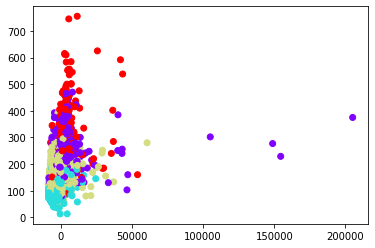

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
pca.fit(dataset[['Gr Liv Area', 'Lot Area', 'Lot Frontage', 'Overall Qual', 'Total Bsmt SF', 'Wood Deck SF']])
x_pca = pca.transform(dataset[['Gr Liv Area', 'Lot Area', 'Lot Frontage', 'Overall Qual', 'Total Bsmt SF', 'Wood Deck SF']])

plt.scatter(x_pca, dataset['SalePrice'], c=kmeans.labels_, cmap='rainbow')